# OptimalQ home assignment

In [426]:
import pandas as pd
import random
import numpy as np

In [427]:
# data = '../data/train'
data = '../data/train_20'
# data = '../data/train_10000'

In [428]:
df = pd.read_csv(data)

### Get small amount of the device ids

In [429]:
print('We have {} unique device_id values'.format(len(df['device_id'].unique())))

# let sample 20% from it:
unique_device_ids = df['device_id'].unique()

unique_device_ids_to_take = random.sample(unique_device_ids, int(len(unique_device_ids) * 0.2))

print 'We are taking {} of the devices'.format(len(unique_device_ids_to_take))

filtered = df[df.device_id.isin(unique_device_ids_to_take)]
print 'After filter, we are left with {} rows'.format(len(filtered))


We have 624692 unique device_id values
We are taking 124938 of the devices
After filter, we are left with 286527 rows


## Check if the data is imbalanced:

In [430]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286527 entries, 42 to 8085766
Data columns (total 24 columns):
id                  286527 non-null float64
click               286527 non-null int64
hour                286527 non-null int64
C1                  286527 non-null int64
banner_pos          286527 non-null int64
site_id             286527 non-null object
site_domain         286527 non-null object
site_category       286527 non-null object
app_id              286527 non-null object
app_domain          286527 non-null object
app_category        286527 non-null object
device_id           286527 non-null object
device_ip           286527 non-null object
device_model        286527 non-null object
device_type         286527 non-null int64
device_conn_type    286527 non-null int64
C14                 286527 non-null int64
C15                 286527 non-null int64
C16                 286527 non-null int64
C17                 286527 non-null int64
C18                 286527 non-null 

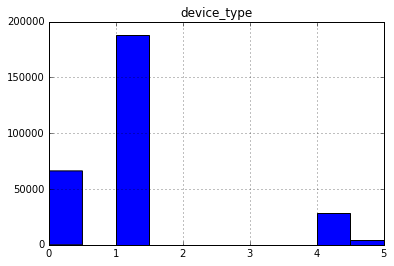

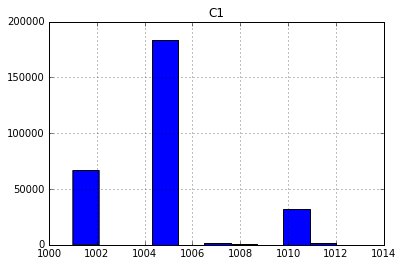

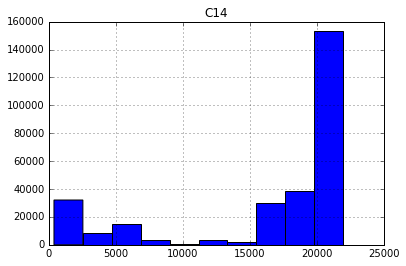

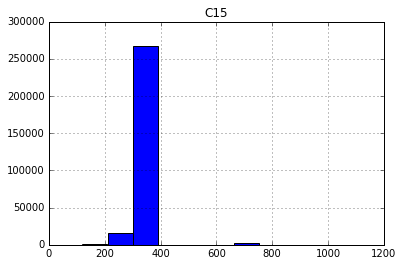

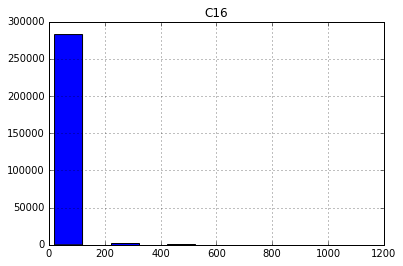

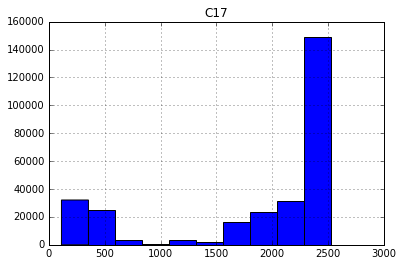

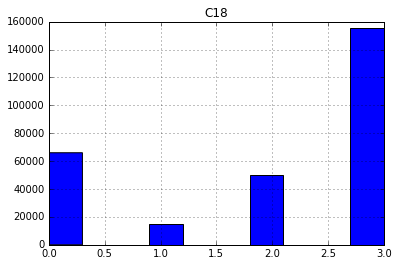

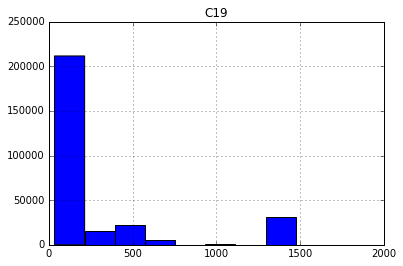

In [431]:
# the data is unbalanced: we have much more devices of type '1' than '0', '4' and '5'
# print filtered['device_type'].value_counts()
# print filtered['C1'].value_counts()
import pylab as P

def create_histogram(data_frame, column_name):
    data_frame[column_name].hist()
    P.title(column_name)
    P.show()
    
create_histogram(data_frame=filtered, column_name='device_type')
create_histogram(data_frame=filtered, column_name='C1')
create_histogram(data_frame=filtered, column_name='C14')
create_histogram(data_frame=filtered, column_name='C15')
create_histogram(data_frame=filtered, column_name='C16')
create_histogram(data_frame=filtered, column_name='C17')
create_histogram(data_frame=filtered, column_name='C18')
create_histogram(data_frame=filtered, column_name='C19')


### 2.a. How balanced is the dataset with respect to the labels?
After checked the several columns, the data seems to be very unbalanced 

## Checking user activity:

In [432]:
filtered['click'].mean()

def count_clicks_mean_by_device(device_type):
    return filtered.loc[filtered['device_type'] == device_type]['click'].mean()
    
print count_clicks_mean_by_device(device_type=0)
print count_clicks_mean_by_device(device_type=1)
print count_clicks_mean_by_device(device_type=4)
print count_clicks_mean_by_device(device_type=5)


0.220911973426
0.142074089054
0.102722335849
0.0754342431762


### 2.b. How active are users? Is this behavior expected?
Seems like ~15.5% of the addes were clicked. This is extremly high number (according to different sources, 3% is already consited extremly high)
We can also see that the the highest click rate have device_id = 0

### Most popular apps:

In [433]:
print 'The 5 most poplutar app domains'
print filtered['app_domain'].value_counts().head(5)

print 'The 5 most popular app categories:'
print filtered['app_category'].value_counts().head(5)

print 'The 5 most poplutar apps'
print filtered['app_id'].value_counts().head(5)

The 5 most poplutar app domains
7801e8d9    107935
2347f47a     84094
b9528b13     33734
5c5a694b     22522
6f7ca2ba     13412
Name: app_domain, dtype: int64
The 5 most popular app categories:
0f2161f8    121568
07d7df22     68280
cef3e649     51852
8ded1f7a     26254
f95efa07      5224
Name: app_category, dtype: int64
The 5 most poplutar apps
ecad2386    51578
7358e05e    32916
e2fcccd2    22522
66f5e02e    13412
54c5d545     8315
Name: app_id, dtype: int64


## Is there any connection between apps or specific device types to clicks?

In [434]:
# lets's find the devices that most of the click came from:
only_clicked = filtered.loc[filtered['click'] == 1]
print 'Most popular devices'
print filtered['device_type'].value_counts()

print 'Most popular devices that the clicks came from'
print only_clicked['device_type'].value_counts()

# We can see that the ratio similarity between the two most popular devices (1 & 0) and devices with the 
# clicks is more or less the same.
# For places 3 &4 (devices 4 & 5), we can see that there is less chance to get a click if you are using 
# these device

Most popular devices
1    187909
0     66230
4     28358
5      4030
Name: device_type, dtype: int64
Most popular devices that the clicks came from
1    26697
0    14631
4     2913
5      304
Name: device_type, dtype: int64


In [435]:
# lets's find the apps that most of the click came from:
print 'Most popular app domain'
print filtered['app_domain'].value_counts().head(5)
print 'Most popular app domain with click'
print only_clicked['app_domain'].value_counts().head(5)

print 'We see that 2347f47a domain to more unlickly to get clicked on (out of top 5)'

print 'Most popular app category'
print filtered['app_category'].value_counts().head(5)
print 'Most popular app category with click'
print only_clicked['app_category'].value_counts().head(5)
print 'We see that there is high chance to get click with 07d7df22, and low with 09481d60 (out of top 5) '

print 'Most popular app id'
print filtered['app_id'].value_counts().head(5)
print 'Most popular app id with click'
print only_clicked['app_id'].value_counts().head(5)
print 'We see that 54c5d545 app is to more unlickly to get clicked on (out of top 5)'


Most popular app domain
7801e8d9    107935
2347f47a     84094
b9528b13     33734
5c5a694b     22522
6f7ca2ba     13412
Name: app_domain, dtype: int64
Most popular app domain with click
7801e8d9    18435
2347f47a     9092
b9528b13     8770
5c5a694b     3166
6f7ca2ba     2832
Name: app_domain, dtype: int64
We see that 2347f47a domain to more unlickly to get clicked on (out of top 5)
Most popular app category
0f2161f8    121568
07d7df22     68280
cef3e649     51852
8ded1f7a     26254
f95efa07      5224
Name: app_category, dtype: int64
Most popular app category with click
0f2161f8    16166
07d7df22    14758
cef3e649     9817
8ded1f7a     1732
f95efa07      815
Name: app_category, dtype: int64
We see that there is high chance to get click with 07d7df22, and low with 09481d60 (out of top 5) 
Most popular app id
ecad2386    51578
7358e05e    32916
e2fcccd2    22522
66f5e02e    13412
54c5d545     8315
Name: app_id, dtype: int64
Most popular app id with click
ecad2386    10428
7358e05e     8735

## Predictive model to predict clicks:

In [436]:
from sklearn.model_selection import train_test_split

# filtered['app_id'].astype(int)

def data_train_test_split(columns, target_column):
    X = filtered[columns]
    y = filtered[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    return X_train, X_test, y_train, y_test

columns = ['device_type', 'C1', 'C15', 'C16', 'C14', 'C17', 'C20']
# columns = ['app_id']
X_train, X_test, y_train, y_test = data_train_test_split(columns=columns, target_column='click')

print len(X_train), len(y_train)
print len(X_test), len(y_test)



214895 214895
71632 71632


In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression()
knn = neighbors.KNeighborsClassifier()
# random_forest = RandomForestClassifier(n_jobs=2, random_state=0)


def predict(X_train, X_test, y_train, y_test, algo, metric):
    algo.fit(X_train, y_train)
    predictions = algo.predict(X_test)
    return metric(predictions, y_test)
    

print predict(X_train, X_test, y_train, y_test, algo=logreg, metric=accuracy_score)
    

0.845878936788


In [285]:
print '___________________________________________'

___________________________________________


In [ ]:


def count_lines_without_header(file_path):
    """
    counts the lines in the file without loading it
    """
    with (open(file_path, 'r')) as f:
        return len(f.readlines()) - 1


def random_sample(file_path, percentage):
    num_lines = sum(1 for l in open(file_path))
    print 'num_lines: ', num_lines

    # Sample size - in this case ~10%
    size = num_lines - int(num_lines / 10)
    print 'size: ', size

    # The row indices to skip - make sure 0 is not included to keep the header!
    skip_idx = random.sample(range(1, num_lines), num_lines - size)
    print 'skip_idx: ',len(skip_idx)
    
    # Read the data
    df = pd.read_csv(file_path, skiprows=skip_idx)




#     df = pd.read_csv(file_path, skiprows=skip)
    return df



df = random_sample(file_path=data, percentage=0.1)


    

### Inspect the data:

In [167]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 24 columns):
id                  8999 non-null uint64
click               8999 non-null int64
hour                8999 non-null int64
C1                  8999 non-null int64
banner_pos          8999 non-null int64
site_id             8999 non-null object
site_domain         8999 non-null object
site_category       8999 non-null object
app_id              8999 non-null object
app_domain          8999 non-null object
app_category        8999 non-null object
device_id           8999 non-null object
device_ip           8999 non-null object
device_model        8999 non-null object
device_type         8999 non-null int64
device_conn_type    8999 non-null int64
C14                 8999 non-null int64
C15                 8999 non-null int64
C16                 8999 non-null int64
C17                 8999 non-null int64
C18                 8999 non-null int64
C19                 8999 non-null int64
C20

In [169]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,8.999000e+03,8999.000000,8999.0,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,9.793914e+18,0.170241,14102100.0,1005.064563,0.193910,1.070563,0.204578,17707.037226,318.444272,56.810979,1967.414490,0.792199,125.248472,37773.757417,88.125570
std,2.859333e+18,0.375865,0.0,1.110053,0.402623,0.606715,0.647320,3145.529810,10.863148,36.894408,386.577054,1.230738,233.239047,48523.527339,45.075835
min,1.004777e+16,0.000000,14102100.0,1001.000000,0.000000,0.000000,0.000000,375.000000,216.000000,36.000000,112.000000,0.000000,35.000000,-1.000000,13.000000
25%,1.025050e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.063302e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.100824e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,20362.000000,320.000000,50.000000,2307.000000,2.000000,39.000000,100083.000000,117.000000
max,1.138466e+19,1.000000,14102100.0,1010.000000,5.000000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [256]:
df['click'].mean()
# about 17.5% of the adds were clicked

0.16365669559642396

1    8340
0     341
4     296
5      22
Name: device_type, dtype: int64


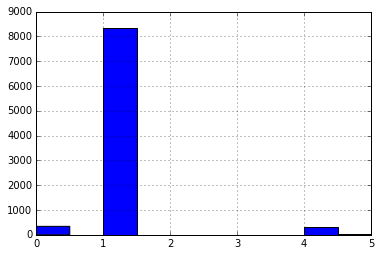

In [171]:
print df['device_type'].value_counts()
# we have 5 different devices

df['device_type'].hist()

In [172]:
sampler = df.imbalance.under_sampling.ClusterCentroids()
sampled = df.fi

AttributeError: 'DataFrame' object has no attribute 'imbalance'

In [175]:
len(df['device_id'].value_counts())

978

In [114]:
df['app_id'].value_counts().head(10)
# these are the 10 most popular apps

ecad2386    1
Name: app_id, dtype: int64

In [115]:
df.loc[df['app_id'] == 'ecad2386']['device_type'].value_counts()


1    1
Name: device_type, dtype: int64